# Exploratory Data Analysis

Comenzaremos explorando los datos de entrada: tipos de datos, distribución, outliers, etc.

In [67]:
import pandas as pd
import numpy as np

In [68]:
dataset_scl = pd.read_csv("../input_data/dataset_SCL.csv", parse_dates=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_8500\2513056093.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_scl = pd.read_csv("../input_data/dataset_SCL.csv", parse_dates=True)


In [69]:
dataset_scl.shape

(68206, 18)

Tenemos 18 columnas y 68.206 resgitros de vuelos

In [70]:
dataset_scl.head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami


Corregir el error de tipos de datos

In [71]:
# Fecha-I
dataset_scl['Fecha-I'] = pd.to_datetime(dataset_scl['Fecha-I'])
dataset_scl['Fecha-O'] = pd.to_datetime(dataset_scl['Fecha-O'])

In [72]:
dataset_scl[pd.to_numeric(dataset_scl['Vlo-I'], errors='coerce').isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
27464,2017-06-16 20:30:00,940P,SCEL,KDFW,AAL,2017-06-16 20:50:00,940,SCEL,KDFW,AAL,16,6,2017,Viernes,I,American Airlines,Santiago,Dallas
39225,2017-08-07 19:00:00,591P,SCEL,LFPG,PUE,2017-08-07 20:35:00,591P,SCEL,LFPG,PUE,7,8,2017,Lunes,I,Plus Ultra Lineas Aereas,Santiago,Paris
39266,2017-08-24 23:00:00,846A,SCEL,KIAH,UAL,2017-08-24 23:00:00,2804,SCEL,KIAH,UAL,24,8,2017,Jueves,I,United Airlines,Santiago,Houston
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena


In [73]:
dataset_scl[pd.to_numeric(dataset_scl['Vlo-O'], errors='coerce').isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
13906,2017-03-30 10:30:00,71,SCEL,SCIE,SKU,2017-03-30 10:50:00,71R,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071,SCEL,SCIE,SKU,2017-03-22 11:00:00,71R,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201,SCEL,SCIE,LXP,2017-03-22 11:50:00,201R,SCEL,SCIE,LXP,22,3,2017,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71,SCEL,SCIE,SKU,2017-04-25 09:29:00,71R,SCEL,SCIE,SKU,25,4,2017,Martes,N,Sky Airline,Santiago,Concepcion
22167,2017-04-06 21:10:00,43,SCEL,SCIE,LAW,2017-04-06 21:24:00,43R,SCEL,SCIE,JMR,6,4,2017,Jueves,N,Latin American Wings,Santiago,Concepcion
22301,2017-05-26 09:40:00,401,SCEL,LFPG,AFR,2017-05-26 10:03:00,401A,SCEL,LFPG,AFR,26,5,2017,Viernes,I,Air France,Santiago,Paris
22302,2017-05-28 09:40:00,401,SCEL,LFPG,AFR,2017-05-28 09:43:00,401B,SCEL,LFPG,AFR,28,5,2017,Domingo,I,Air France,Santiago,Paris
24304,2017-05-11 10:00:00,802,SCEL,SPJC,SKU,2017-05-11 10:36:00,802R,SCEL,SPJC,SKU,11,5,2017,Jueves,I,Sky Airline,Santiago,Lima
27246,2017-05-15 12:15:00,114,SCEL,SCAT,LAN,2017-05-15 13:10:00,114R,SCEL,SCAT,LAN,15,5,2017,Lunes,N,Grupo LATAM,Santiago,Copiapo


Existen algunos valores no númericos en las columnas Vlo-I y Vlo-O, 5 y 18 respectivamente, son muy pocos registros frente a los 68 mil totales, los vamos a ignorar.

In [74]:
dataset_scl = dataset_scl[~pd.to_numeric(dataset_scl['Vlo-I'], errors='coerce').isnull()]
dataset_scl = dataset_scl[~pd.to_numeric(dataset_scl['Vlo-O'], errors='coerce').isnull()]
dataset_scl.shape

(68185, 18)

In [75]:
dataset_scl.head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami


In [76]:
dataset_scl[pd.to_numeric(dataset_scl['DIA'], errors='coerce').isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [77]:
dataset_scl[pd.to_numeric(dataset_scl['MES'], errors='coerce').isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [78]:
dataset_scl[pd.to_numeric(dataset_scl['AÑO'], errors='coerce').isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


No existen errores en las columnas DIA, MES y AÑO

## Analizar valores de columnas

In [79]:
# Fecha-I & Fecha-O
print(dataset_scl['Fecha-I'].min(), dataset_scl['Fecha-I'].max())
print(dataset_scl['Fecha-O'].min(), dataset_scl['Fecha-O'].max())

2017-01-01 00:15:00 2017-12-31 23:55:00
2017-01-01 00:04:00 2018-01-01 00:12:00


Tenemos datos de todo el año 2017. Existen meses o días con mayor frecuencia de vuelos?

<AxesSubplot: >

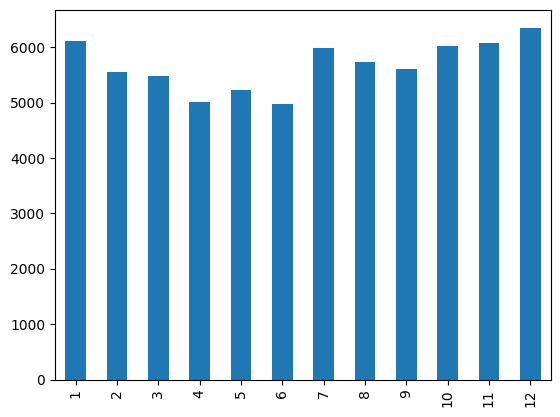

In [80]:
dataset_scl.MES.value_counts().sort_index().plot(kind = 'bar')

Existe una mayor frecuencia de vuelos en los meses de vacaciones (Diciembre y Enero). Y también en Julio (vacaciones de invierno)

<AxesSubplot: >

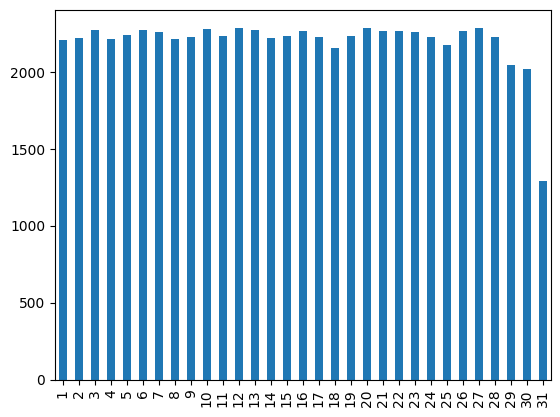

In [81]:
dataset_scl.DIA.value_counts().sort_index().plot(kind = 'bar')

Al parecer no hay alguna preferencia en cuanto a los días. Existe una baja en los últimos días del mes, pero se explica por la cantidad de días que tiene cada mes.

Existen más vuelos nacionales o internacionales?

In [82]:
dataset_scl.TIPOVUELO.value_counts(normalize=True)

N    0.542011
I    0.457989
Name: TIPOVUELO, dtype: float64

El 45.8% de los vuelos son dentro del país.

Cual es la distribución de los operadores?

In [83]:
dataset_scl.OPERA.value_counts(normalize=True).head(5)

Grupo LATAM              0.599619
Sky Airline              0.209621
Aerolineas Argentinas    0.028584
Copa Air                 0.027132
Latin American Wings     0.024522
Name: OPERA, dtype: float64

LATAM (60%) y Sky (21%) acumulan más del 80% de los vuelos.

Cual es el top 5 ciudades origen y destino?

In [60]:
dataset_scl.SIGLAORI.value_counts(normalize=True).head(5)

Santiago    1.0
Name: SIGLAORI, dtype: float64

In [62]:
dataset_scl['Ori-I'].value_counts(normalize=True).head(5)

SCEL    1.0
Name: Ori-I, dtype: float64

**Solo hay registros de vuelos desde Santiago**

In [61]:
dataset_scl.SIGLADES.value_counts(normalize=True).head(5)

Buenos Aires    0.092909
Antofagasta     0.084843
Lima            0.077260
Calama          0.075471
Puerto Montt    0.063900
Name: SIGLADES, dtype: float64

Los destinos más comunes son: **Buenos Aires, Antofagasta, Lima, Calama y Puerto Montt**